## Libraries 

In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(16,10))

In [6]:
import json

In [7]:
from sklearn import preprocessing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
#!pip install lightgbm
import lightgbm as lgb

In [10]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.models import Model
from pathlib import Path

In [11]:
from keras.optimizers import Adam
from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

In [12]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import LeakyReLU

In [13]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import cross_val_score, cross_validate ,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

---------------

## Functions

In [15]:
def checkBalance(dataset,target_name):
    print("=======================================")
    print(f"Target Name : {target_name}")
    print("=======================================")
    print("value count")
    print(dataset[target_name].value_counts())
    print("=======================================")
    sns.histplot(x =target_name,data = dataset)
    plt.show()

In [12]:
def check_unique(dataframe,feature_name,target_name):
    # get a list of the unique values 
    uniqueLst = list(dataframe[feature_name].unique())
    # the length of the unique values 
    uniquelength = len(uniqueLst)
    # count the appenrance of each value in the dataset 
    count = dataframe[feature_name].value_counts()
    sorted_count = count.sort_values() 
    # print some information about the feature 
    print(f"Feature : {feature_name}")
    print(f"Number of unique values : {uniquelength}")
    print("=================================")
    print("(Attack'category,count)")
    print(sorted_count)
    print("=================================")
    #sns.histplot(data=, x=feature_name,hue="label", kde=True)
    sns.displot(x =feature_name,hue=target_name,data = dataframe, kind="kde", multiple="stack")
    plt.show()

In [13]:
def count_number_word(lst_of_lst):
    
    wv_lens =[]

    for x in lst_of_lst:
         wv_lens.append(len(x))

    myset = set(wv_lens)

    counts = [wv_lens.count(x)for x in myset]

    df2 = pd.DataFrame({
        "number of words":list(myset),
        "count":counts
    })
    
    return df2


In [14]:
def padd_zeros(row,n_words):
    # get number of words in this row
    length = len(row)
    # create new list that contain the value of the new length 
    new_lst = []
    
    for i in range(n_words):
        if i < length:
            new_lst.append(row[i])
        else:
    
            listofzeros = [0]*100
            new_lst.append(list(listofzeros))   
        
        
    row = new_lst
    
    return row

In [15]:
def prepare_equalWords_data(data,n_words):
    # create a new data frame 
    nemDF = data.copy()
    # pad zeros 
    nemDF['word_vector'] = nemDF['word_vector'].apply(lambda row: padd_zeros(row,n_words)) 
    # recount again 
    nemDF['word_count']  = nemDF['word_vector'].apply(lambda x: len(x))    
    # encode the label to be 0 and 1 instead 1 and 2 
    nemDF['label']  = nemDF['label'].apply(lambda x: int(x-1))    
    
    return nemDF

In [16]:
def visualize_class(data,y):
    plt.figure(figsize=(20,20))
    
    s= [v== y for v in data['label']]
    idxs = np.flatnonzero(s)
    idxs = np.random.choice(idxs, 5, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(1,5, i+1)
        plt.imshow(data['word_vector'][idx])
        plt.axis('off')
        plt.title(y)
    plt.show()
            
def visualize_classes(data,classes):
    for y in classes:
        visualize_class(data,y)
    

In [17]:
def normalize_lst(a):
    lst = np.array(a).reshape(-1,1)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    normalizedlist=scaler.fit_transform(lst)
    return normalizedlist

In [18]:
def get_words(data_frame,n_words):    
    new_x=[]

    for i in range(len(data_frame)):
            templist= np.array([]) 
            np_word = np.array(data_frame['word_vector'][i])
            templist= np.append(templist,np_word[:n_words])
            
            if(np_word.shape[0] <  n_words):
                numeToAdd = n_words - np_word.shape[0]
                templist= np.append(templist, np.zeros(100*numeToAdd))
            
            templist=templist.tolist()
            new_x.append(templist) 

    return new_x

In [19]:
import keras.backend as K
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [71]:
def plot_report_confusionMatrix(y_pred,y_true):
    cm = confusion_matrix(y_true,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred))
    plot_report_confusionMatrix(y_pred,y_true)
    print("==============================================================")
    return f1_score(y_true, y_pred) 

def apply_CV_F1(model,X,y):
    # Nested CV with parameter optimization
    nested_score = cross_val_score(model, X, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
    print("==============================================================")
    print(f"the f1-score in all iterations       : {nested_score}")
    print(f"the mean of f1-scores                : {nested_score.mean()}")
    print(f"the std  of f1-scores                : {nested_score.std()}")
    print("==============================================================")
    return nested_score.mean() , nested_score.std(),nested_score

--------------

### read the data 

In [20]:
data5_2 = pd.read_csv("D:/Uottawa/Semster 2/Ai for Cyber Security/data5.csv")
data5_2['word_vector'] = [json.loads(x) for x in data5_2['word_vector']] # list of lists 

In [21]:
data5_2.head()

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,5
1,1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,5
2,2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,5
3,3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,5
4,4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,5


### make each row as only one list instead of list of lists 

In [22]:
X_oneLstPerRow = get_words(data5_2,5)

In [23]:
len(X_oneLstPerRow)

123040

### split the data 

In [24]:
y = data5_2['label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_oneLstPerRow, y, test_size=0.2,stratify=y, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train, random_state=1) 

In [26]:
pd.DataFrame(y_train).value_counts()

label
0        36912
1        36912
dtype: int64

In [27]:
pd.DataFrame(y_val).value_counts()

label
0        12304
1        12304
dtype: int64

In [28]:
pd.DataFrame(y_test).value_counts()

label
0        12304
1        12304
dtype: int64

<h3 style="color:maroon;"> Normalize each word to be in 0 to 1 scale </h3>

In [29]:
#lst = np.array().reshape(-1,1)
scaler  = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

### Reshape the data so it can be used as images 

--------

<h2 style="color:rgb(74, 70, 11);">Part 0</h2>

<h3 style="color:maroon;">BaseLine model</h3>

### Models 

In [30]:
# dicision_tree
decTree_CLF = DecisionTreeClassifier(random_state=0)
# XG_boost
xgb_CLF = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
# random_forest
rf_CLF = RandomForestClassifier(n_estimators=100, random_state=0)
# AdaBoost
ada_CLF = AdaBoostClassifier(n_estimators=100,random_state=0)
# HistGradientBoostingClassifier
gradiant_boost_CLF =  HistGradientBoostingClassifier(random_state=0)
# CatBoostClassifier
catBoost_CLF = CatBoostClassifier(random_state=0)
# LGBMClassifier
lightGBM_CLF = lgb.LGBMClassifier(random_state=0)

In [31]:
components=[5,10,20,30,50]
models = [decTree_CLF ,xgb_CLF ,rf_CLF ,ada_CLF ,gradiant_boost_CLF ,catBoost_CLF ,lightGBM_CLF]
models_names = ['dicision_tree','XG_boost','random_forest','AdaBoost','HistGradientBoostingClassifier','CatBoostClassifier','LGBMClassifier']
f1_scores = []
combinations = []
def get_f1_score_4_PCA(X_tr,y_tr,X_val,y_val,model):
    clf =model.fit(X_tr, y_tr)
    pred=clf.predict(X_val)
    f1_score_value = f1_score(pred, y_val) 
    return f1_score_value

for i in components:
    # create instance from PCA 
    pca = PCA(n_components=i,random_state=0)
    
    # fit PCA 
    X_train_pca =pca.fit_transform(X_train)
    X_val_pca   =pca.transform(X_val)
    
    for j, m in enumerate(models): 
        f1_score_value = get_f1_score_4_PCA(X_train_pca,y_train,X_val_pca,y_val,m)
        f1_scores.append(f1_score_value)
        st = f"{models_names[j]} , C:{i}"
        print(f"{models_names[j]} ,f1: {f1_score_value:.3f}, C:{i}")
        combinations.append(st)
    

dicision_tree ,f1: 0.723, C:5
XG_boost ,f1: 0.726, C:5
random_forest ,f1: 0.728, C:5
AdaBoost ,f1: 0.792, C:5
HistGradientBoostingClassifier ,f1: 0.704, C:5
Learning rate set to 0.064663
0:	learn: 0.6351308	total: 90.7ms	remaining: 1m 30s
1:	learn: 0.5931126	total: 112ms	remaining: 56.1s
2:	learn: 0.5627527	total: 126ms	remaining: 41.9s
3:	learn: 0.5362186	total: 136ms	remaining: 33.8s
4:	learn: 0.5180657	total: 143ms	remaining: 28.5s
5:	learn: 0.5014718	total: 150ms	remaining: 24.9s
6:	learn: 0.4916775	total: 158ms	remaining: 22.3s
7:	learn: 0.4829148	total: 165ms	remaining: 20.5s
8:	learn: 0.4766250	total: 172ms	remaining: 18.9s
9:	learn: 0.4705636	total: 179ms	remaining: 17.7s
10:	learn: 0.4613518	total: 186ms	remaining: 16.7s
11:	learn: 0.4541651	total: 193ms	remaining: 15.9s
12:	learn: 0.4480614	total: 200ms	remaining: 15.2s
13:	learn: 0.4413396	total: 207ms	remaining: 14.6s
14:	learn: 0.4365324	total: 213ms	remaining: 14s
15:	learn: 0.4323803	total: 220ms	remaining: 13.5s
16:	lea

158:	learn: 0.3523069	total: 1.22s	remaining: 6.46s
159:	learn: 0.3522148	total: 1.23s	remaining: 6.46s
160:	learn: 0.3521297	total: 1.24s	remaining: 6.44s
161:	learn: 0.3519939	total: 1.24s	remaining: 6.43s
162:	learn: 0.3518672	total: 1.25s	remaining: 6.42s
163:	learn: 0.3517434	total: 1.26s	remaining: 6.41s
164:	learn: 0.3515836	total: 1.26s	remaining: 6.4s
165:	learn: 0.3515003	total: 1.27s	remaining: 6.39s
166:	learn: 0.3513727	total: 1.28s	remaining: 6.38s
167:	learn: 0.3512286	total: 1.28s	remaining: 6.37s
168:	learn: 0.3511460	total: 1.29s	remaining: 6.35s
169:	learn: 0.3510413	total: 1.3s	remaining: 6.34s
170:	learn: 0.3509401	total: 1.3s	remaining: 6.33s
171:	learn: 0.3508707	total: 1.31s	remaining: 6.31s
172:	learn: 0.3507634	total: 1.32s	remaining: 6.3s
173:	learn: 0.3506416	total: 1.32s	remaining: 6.29s
174:	learn: 0.3504833	total: 1.33s	remaining: 6.27s
175:	learn: 0.3503603	total: 1.34s	remaining: 6.26s
176:	learn: 0.3501761	total: 1.34s	remaining: 6.25s
177:	learn: 0.35

336:	learn: 0.3381765	total: 2.52s	remaining: 4.95s
337:	learn: 0.3381373	total: 2.52s	remaining: 4.94s
338:	learn: 0.3380916	total: 2.53s	remaining: 4.93s
339:	learn: 0.3380232	total: 2.54s	remaining: 4.93s
340:	learn: 0.3379815	total: 2.55s	remaining: 4.92s
341:	learn: 0.3379573	total: 2.55s	remaining: 4.91s
342:	learn: 0.3379224	total: 2.56s	remaining: 4.91s
343:	learn: 0.3378488	total: 2.57s	remaining: 4.9s
344:	learn: 0.3377837	total: 2.58s	remaining: 4.89s
345:	learn: 0.3377068	total: 2.58s	remaining: 4.88s
346:	learn: 0.3376744	total: 2.59s	remaining: 4.88s
347:	learn: 0.3376385	total: 2.6s	remaining: 4.87s
348:	learn: 0.3375823	total: 2.6s	remaining: 4.86s
349:	learn: 0.3375180	total: 2.61s	remaining: 4.85s
350:	learn: 0.3374871	total: 2.62s	remaining: 4.84s
351:	learn: 0.3374214	total: 2.63s	remaining: 4.84s
352:	learn: 0.3373671	total: 2.63s	remaining: 4.83s
353:	learn: 0.3373039	total: 2.64s	remaining: 4.82s
354:	learn: 0.3372432	total: 2.65s	remaining: 4.82s
355:	learn: 0.3

516:	learn: 0.3310461	total: 3.8s	remaining: 3.55s
517:	learn: 0.3310107	total: 3.81s	remaining: 3.54s
518:	learn: 0.3309902	total: 3.81s	remaining: 3.54s
519:	learn: 0.3309614	total: 3.82s	remaining: 3.53s
520:	learn: 0.3309376	total: 3.83s	remaining: 3.52s
521:	learn: 0.3309115	total: 3.83s	remaining: 3.51s
522:	learn: 0.3308586	total: 3.84s	remaining: 3.5s
523:	learn: 0.3308222	total: 3.85s	remaining: 3.5s
524:	learn: 0.3308010	total: 3.86s	remaining: 3.49s
525:	learn: 0.3307861	total: 3.86s	remaining: 3.48s
526:	learn: 0.3307609	total: 3.87s	remaining: 3.47s
527:	learn: 0.3307379	total: 3.88s	remaining: 3.47s
528:	learn: 0.3307245	total: 3.88s	remaining: 3.46s
529:	learn: 0.3306915	total: 3.89s	remaining: 3.45s
530:	learn: 0.3306365	total: 3.9s	remaining: 3.44s
531:	learn: 0.3305872	total: 3.9s	remaining: 3.43s
532:	learn: 0.3305773	total: 3.91s	remaining: 3.43s
533:	learn: 0.3305430	total: 3.92s	remaining: 3.42s
534:	learn: 0.3305117	total: 3.92s	remaining: 3.41s
535:	learn: 0.330

675:	learn: 0.3271183	total: 4.92s	remaining: 2.36s
676:	learn: 0.3271006	total: 4.93s	remaining: 2.35s
677:	learn: 0.3270813	total: 4.93s	remaining: 2.34s
678:	learn: 0.3270509	total: 4.94s	remaining: 2.33s
679:	learn: 0.3270195	total: 4.95s	remaining: 2.33s
680:	learn: 0.3269928	total: 4.96s	remaining: 2.32s
681:	learn: 0.3269723	total: 4.96s	remaining: 2.31s
682:	learn: 0.3269539	total: 4.97s	remaining: 2.31s
683:	learn: 0.3269073	total: 4.98s	remaining: 2.3s
684:	learn: 0.3268943	total: 4.99s	remaining: 2.29s
685:	learn: 0.3268592	total: 4.99s	remaining: 2.29s
686:	learn: 0.3268477	total: 5s	remaining: 2.28s
687:	learn: 0.3268225	total: 5.01s	remaining: 2.27s
688:	learn: 0.3267965	total: 5.01s	remaining: 2.26s
689:	learn: 0.3267863	total: 5.02s	remaining: 2.26s
690:	learn: 0.3267638	total: 5.03s	remaining: 2.25s
691:	learn: 0.3267639	total: 5.03s	remaining: 2.24s
692:	learn: 0.3267427	total: 5.04s	remaining: 2.23s
693:	learn: 0.3267274	total: 5.05s	remaining: 2.23s
694:	learn: 0.32

834:	learn: 0.3245090	total: 6.04s	remaining: 1.19s
835:	learn: 0.3244959	total: 6.05s	remaining: 1.19s
836:	learn: 0.3244885	total: 6.06s	remaining: 1.18s
837:	learn: 0.3244704	total: 6.07s	remaining: 1.17s
838:	learn: 0.3244554	total: 6.07s	remaining: 1.17s
839:	learn: 0.3244428	total: 6.08s	remaining: 1.16s
840:	learn: 0.3244329	total: 6.09s	remaining: 1.15s
841:	learn: 0.3244217	total: 6.09s	remaining: 1.14s
842:	learn: 0.3244120	total: 6.1s	remaining: 1.14s
843:	learn: 0.3244088	total: 6.11s	remaining: 1.13s
844:	learn: 0.3244012	total: 6.11s	remaining: 1.12s
845:	learn: 0.3243941	total: 6.12s	remaining: 1.11s
846:	learn: 0.3243782	total: 6.13s	remaining: 1.11s
847:	learn: 0.3243646	total: 6.13s	remaining: 1.1s
848:	learn: 0.3243553	total: 6.14s	remaining: 1.09s
849:	learn: 0.3243463	total: 6.15s	remaining: 1.08s
850:	learn: 0.3243265	total: 6.16s	remaining: 1.08s
851:	learn: 0.3243148	total: 6.16s	remaining: 1.07s
852:	learn: 0.3243004	total: 6.17s	remaining: 1.06s
853:	learn: 0.

CatBoostClassifier ,f1: 0.726, C:5
LGBMClassifier ,f1: 0.723, C:5
dicision_tree ,f1: 0.726, C:10
XG_boost ,f1: 0.727, C:10
random_forest ,f1: 0.729, C:10
AdaBoost ,f1: 0.786, C:10
HistGradientBoostingClassifier ,f1: 0.705, C:10
Learning rate set to 0.064663
0:	learn: 0.6296043	total: 32.6ms	remaining: 32.5s
1:	learn: 0.5826811	total: 47.6ms	remaining: 23.8s
2:	learn: 0.5474521	total: 58.7ms	remaining: 19.5s
3:	learn: 0.5213927	total: 68.4ms	remaining: 17s
4:	learn: 0.4997667	total: 77.4ms	remaining: 15.4s
5:	learn: 0.4860013	total: 87.9ms	remaining: 14.6s
6:	learn: 0.4718238	total: 98.5ms	remaining: 14s
7:	learn: 0.4587001	total: 108ms	remaining: 13.3s
8:	learn: 0.4470657	total: 117ms	remaining: 12.9s
9:	learn: 0.4390636	total: 126ms	remaining: 12.4s
10:	learn: 0.4315132	total: 134ms	remaining: 12s
11:	learn: 0.4260569	total: 142ms	remaining: 11.7s
12:	learn: 0.4216305	total: 150ms	remaining: 11.4s
13:	learn: 0.4174629	total: 159ms	remaining: 11.2s
14:	learn: 0.4126304	total: 167ms	rem

175:	learn: 0.3386014	total: 1.42s	remaining: 6.63s
176:	learn: 0.3384994	total: 1.43s	remaining: 6.63s
177:	learn: 0.3383481	total: 1.43s	remaining: 6.62s
178:	learn: 0.3382520	total: 1.44s	remaining: 6.62s
179:	learn: 0.3381720	total: 1.45s	remaining: 6.61s
180:	learn: 0.3381049	total: 1.46s	remaining: 6.6s
181:	learn: 0.3379799	total: 1.47s	remaining: 6.59s
182:	learn: 0.3378626	total: 1.47s	remaining: 6.58s
183:	learn: 0.3377887	total: 1.48s	remaining: 6.57s
184:	learn: 0.3376644	total: 1.49s	remaining: 6.56s
185:	learn: 0.3375723	total: 1.5s	remaining: 6.55s
186:	learn: 0.3375121	total: 1.5s	remaining: 6.54s
187:	learn: 0.3374619	total: 1.51s	remaining: 6.53s
188:	learn: 0.3373913	total: 1.52s	remaining: 6.52s
189:	learn: 0.3373485	total: 1.53s	remaining: 6.51s
190:	learn: 0.3372176	total: 1.53s	remaining: 6.5s
191:	learn: 0.3371245	total: 1.54s	remaining: 6.49s
192:	learn: 0.3370169	total: 1.55s	remaining: 6.48s
193:	learn: 0.3369430	total: 1.56s	remaining: 6.47s
194:	learn: 0.33

346:	learn: 0.3283235	total: 2.73s	remaining: 5.13s
347:	learn: 0.3282731	total: 2.73s	remaining: 5.12s
348:	learn: 0.3282548	total: 2.74s	remaining: 5.11s
349:	learn: 0.3282128	total: 2.75s	remaining: 5.11s
350:	learn: 0.3281903	total: 2.76s	remaining: 5.1s
351:	learn: 0.3281371	total: 2.76s	remaining: 5.09s
352:	learn: 0.3280853	total: 2.77s	remaining: 5.08s
353:	learn: 0.3280622	total: 2.78s	remaining: 5.07s
354:	learn: 0.3280309	total: 2.79s	remaining: 5.06s
355:	learn: 0.3279938	total: 2.79s	remaining: 5.05s
356:	learn: 0.3279646	total: 2.8s	remaining: 5.04s
357:	learn: 0.3279558	total: 2.81s	remaining: 5.04s
358:	learn: 0.3279101	total: 2.81s	remaining: 5.03s
359:	learn: 0.3278884	total: 2.82s	remaining: 5.02s
360:	learn: 0.3278712	total: 2.83s	remaining: 5.01s
361:	learn: 0.3278388	total: 2.84s	remaining: 5s
362:	learn: 0.3278157	total: 2.85s	remaining: 4.99s
363:	learn: 0.3278006	total: 2.85s	remaining: 4.99s
364:	learn: 0.3277391	total: 2.86s	remaining: 4.98s
365:	learn: 0.327

511:	learn: 0.3237132	total: 4.04s	remaining: 3.85s
512:	learn: 0.3236833	total: 4.05s	remaining: 3.84s
513:	learn: 0.3236588	total: 4.06s	remaining: 3.84s
514:	learn: 0.3236427	total: 4.06s	remaining: 3.83s
515:	learn: 0.3236238	total: 4.07s	remaining: 3.82s
516:	learn: 0.3236140	total: 4.08s	remaining: 3.81s
517:	learn: 0.3235879	total: 4.09s	remaining: 3.8s
518:	learn: 0.3235747	total: 4.09s	remaining: 3.79s
519:	learn: 0.3235512	total: 4.1s	remaining: 3.79s
520:	learn: 0.3235278	total: 4.11s	remaining: 3.78s
521:	learn: 0.3235103	total: 4.12s	remaining: 3.77s
522:	learn: 0.3234619	total: 4.12s	remaining: 3.76s
523:	learn: 0.3234507	total: 4.13s	remaining: 3.75s
524:	learn: 0.3234319	total: 4.14s	remaining: 3.74s
525:	learn: 0.3233993	total: 4.14s	remaining: 3.73s
526:	learn: 0.3233791	total: 4.15s	remaining: 3.73s
527:	learn: 0.3233491	total: 4.16s	remaining: 3.72s
528:	learn: 0.3233132	total: 4.17s	remaining: 3.71s
529:	learn: 0.3232828	total: 4.17s	remaining: 3.7s
530:	learn: 0.3

681:	learn: 0.3208379	total: 5.35s	remaining: 2.49s
682:	learn: 0.3208195	total: 5.36s	remaining: 2.49s
683:	learn: 0.3207955	total: 5.37s	remaining: 2.48s
684:	learn: 0.3207665	total: 5.38s	remaining: 2.47s
685:	learn: 0.3207532	total: 5.38s	remaining: 2.46s
686:	learn: 0.3207312	total: 5.39s	remaining: 2.46s
687:	learn: 0.3207238	total: 5.4s	remaining: 2.45s
688:	learn: 0.3207117	total: 5.41s	remaining: 2.44s
689:	learn: 0.3207014	total: 5.42s	remaining: 2.43s
690:	learn: 0.3206849	total: 5.42s	remaining: 2.43s
691:	learn: 0.3206800	total: 5.43s	remaining: 2.42s
692:	learn: 0.3206760	total: 5.44s	remaining: 2.41s
693:	learn: 0.3206581	total: 5.45s	remaining: 2.4s
694:	learn: 0.3206456	total: 5.46s	remaining: 2.4s
695:	learn: 0.3206404	total: 5.47s	remaining: 2.39s
696:	learn: 0.3206366	total: 5.47s	remaining: 2.38s
697:	learn: 0.3206257	total: 5.48s	remaining: 2.37s
698:	learn: 0.3206190	total: 5.49s	remaining: 2.36s
699:	learn: 0.3205947	total: 5.5s	remaining: 2.36s
700:	learn: 0.32

842:	learn: 0.3189692	total: 6.86s	remaining: 1.28s
843:	learn: 0.3189691	total: 6.87s	remaining: 1.27s
844:	learn: 0.3189603	total: 6.88s	remaining: 1.26s
845:	learn: 0.3189541	total: 6.89s	remaining: 1.25s
846:	learn: 0.3189457	total: 6.9s	remaining: 1.25s
847:	learn: 0.3189369	total: 6.91s	remaining: 1.24s
848:	learn: 0.3189242	total: 6.92s	remaining: 1.23s
849:	learn: 0.3189123	total: 6.93s	remaining: 1.22s
850:	learn: 0.3188974	total: 6.94s	remaining: 1.21s
851:	learn: 0.3188889	total: 6.95s	remaining: 1.21s
852:	learn: 0.3188858	total: 6.96s	remaining: 1.2s
853:	learn: 0.3188760	total: 6.96s	remaining: 1.19s
854:	learn: 0.3188639	total: 6.98s	remaining: 1.18s
855:	learn: 0.3188584	total: 6.99s	remaining: 1.18s
856:	learn: 0.3188508	total: 7s	remaining: 1.17s
857:	learn: 0.3188343	total: 7s	remaining: 1.16s
858:	learn: 0.3188291	total: 7.01s	remaining: 1.15s
859:	learn: 0.3188169	total: 7.02s	remaining: 1.14s
860:	learn: 0.3188104	total: 7.03s	remaining: 1.13s
861:	learn: 0.318802

CatBoostClassifier ,f1: 0.728, C:10
LGBMClassifier ,f1: 0.726, C:10
dicision_tree ,f1: 0.726, C:20
XG_boost ,f1: 0.729, C:20
random_forest ,f1: 0.813, C:20
AdaBoost ,f1: 0.716, C:20
HistGradientBoostingClassifier ,f1: 0.722, C:20
Learning rate set to 0.064663
0:	learn: 0.6296548	total: 16.9ms	remaining: 16.9s
1:	learn: 0.5832862	total: 27.6ms	remaining: 13.8s
2:	learn: 0.5473488	total: 36.7ms	remaining: 12.2s
3:	learn: 0.5184628	total: 47.1ms	remaining: 11.7s
4:	learn: 0.4956081	total: 56.8ms	remaining: 11.3s
5:	learn: 0.4771179	total: 66.1ms	remaining: 10.9s
6:	learn: 0.4621078	total: 75.4ms	remaining: 10.7s
7:	learn: 0.4502479	total: 84.7ms	remaining: 10.5s
8:	learn: 0.4431974	total: 93.5ms	remaining: 10.3s
9:	learn: 0.4345362	total: 103ms	remaining: 10.2s
10:	learn: 0.4257093	total: 113ms	remaining: 10.2s
11:	learn: 0.4202005	total: 123ms	remaining: 10.1s
12:	learn: 0.4149076	total: 132ms	remaining: 10s
13:	learn: 0.4087369	total: 141ms	remaining: 9.94s
14:	learn: 0.4051316	total: 1

173:	learn: 0.3317733	total: 1.62s	remaining: 7.67s
174:	learn: 0.3317024	total: 1.63s	remaining: 7.67s
175:	learn: 0.3316030	total: 1.64s	remaining: 7.66s
176:	learn: 0.3315309	total: 1.64s	remaining: 7.64s
177:	learn: 0.3314128	total: 1.65s	remaining: 7.63s
178:	learn: 0.3313334	total: 1.66s	remaining: 7.62s
179:	learn: 0.3312742	total: 1.67s	remaining: 7.61s
180:	learn: 0.3311731	total: 1.68s	remaining: 7.6s
181:	learn: 0.3311151	total: 1.69s	remaining: 7.59s
182:	learn: 0.3310623	total: 1.7s	remaining: 7.58s
183:	learn: 0.3310145	total: 1.71s	remaining: 7.57s
184:	learn: 0.3309533	total: 1.72s	remaining: 7.55s
185:	learn: 0.3308465	total: 1.72s	remaining: 7.54s
186:	learn: 0.3307313	total: 1.73s	remaining: 7.53s
187:	learn: 0.3306763	total: 1.74s	remaining: 7.52s
188:	learn: 0.3306167	total: 1.75s	remaining: 7.5s
189:	learn: 0.3305478	total: 1.76s	remaining: 7.49s
190:	learn: 0.3305261	total: 1.76s	remaining: 7.48s
191:	learn: 0.3304327	total: 1.77s	remaining: 7.47s
192:	learn: 0.3

340:	learn: 0.3237104	total: 3.14s	remaining: 6.07s
341:	learn: 0.3236897	total: 3.15s	remaining: 6.06s
342:	learn: 0.3236311	total: 3.16s	remaining: 6.05s
343:	learn: 0.3236025	total: 3.17s	remaining: 6.04s
344:	learn: 0.3235374	total: 3.18s	remaining: 6.04s
345:	learn: 0.3235227	total: 3.19s	remaining: 6.02s
346:	learn: 0.3235147	total: 3.19s	remaining: 6.01s
347:	learn: 0.3234917	total: 3.2s	remaining: 6s
348:	learn: 0.3234620	total: 3.21s	remaining: 5.99s
349:	learn: 0.3234501	total: 3.22s	remaining: 5.98s
350:	learn: 0.3234202	total: 3.23s	remaining: 5.97s
351:	learn: 0.3233772	total: 3.24s	remaining: 5.96s
352:	learn: 0.3233581	total: 3.25s	remaining: 5.95s
353:	learn: 0.3232688	total: 3.26s	remaining: 5.94s
354:	learn: 0.3232084	total: 3.27s	remaining: 5.93s
355:	learn: 0.3231635	total: 3.28s	remaining: 5.93s
356:	learn: 0.3231392	total: 3.29s	remaining: 5.92s
357:	learn: 0.3231194	total: 3.29s	remaining: 5.91s
358:	learn: 0.3230599	total: 3.3s	remaining: 5.9s
359:	learn: 0.3230

508:	learn: 0.3197994	total: 4.66s	remaining: 4.49s
509:	learn: 0.3197843	total: 4.67s	remaining: 4.48s
510:	learn: 0.3197694	total: 4.68s	remaining: 4.48s
511:	learn: 0.3197453	total: 4.69s	remaining: 4.47s
512:	learn: 0.3197229	total: 4.7s	remaining: 4.46s
513:	learn: 0.3197085	total: 4.71s	remaining: 4.45s
514:	learn: 0.3196838	total: 4.71s	remaining: 4.44s
515:	learn: 0.3196574	total: 4.72s	remaining: 4.43s
516:	learn: 0.3196368	total: 4.73s	remaining: 4.42s
517:	learn: 0.3196231	total: 4.74s	remaining: 4.41s
518:	learn: 0.3195965	total: 4.75s	remaining: 4.4s
519:	learn: 0.3195842	total: 4.76s	remaining: 4.39s
520:	learn: 0.3195651	total: 4.77s	remaining: 4.38s
521:	learn: 0.3195497	total: 4.78s	remaining: 4.38s
522:	learn: 0.3195370	total: 4.79s	remaining: 4.37s
523:	learn: 0.3195218	total: 4.8s	remaining: 4.36s
524:	learn: 0.3195122	total: 4.8s	remaining: 4.35s
525:	learn: 0.3194924	total: 4.81s	remaining: 4.34s
526:	learn: 0.3194843	total: 4.82s	remaining: 4.33s
527:	learn: 0.31

681:	learn: 0.3174274	total: 6.21s	remaining: 2.89s
682:	learn: 0.3174248	total: 6.21s	remaining: 2.88s
683:	learn: 0.3174180	total: 6.22s	remaining: 2.88s
684:	learn: 0.3174097	total: 6.23s	remaining: 2.87s
685:	learn: 0.3174090	total: 6.24s	remaining: 2.85s
686:	learn: 0.3174009	total: 6.25s	remaining: 2.85s
687:	learn: 0.3173938	total: 6.25s	remaining: 2.84s
688:	learn: 0.3173905	total: 6.26s	remaining: 2.83s
689:	learn: 0.3173834	total: 6.27s	remaining: 2.82s
690:	learn: 0.3173777	total: 6.28s	remaining: 2.81s
691:	learn: 0.3173680	total: 6.29s	remaining: 2.8s
692:	learn: 0.3173606	total: 6.3s	remaining: 2.79s
693:	learn: 0.3173436	total: 6.31s	remaining: 2.78s
694:	learn: 0.3173387	total: 6.32s	remaining: 2.77s
695:	learn: 0.3173270	total: 6.33s	remaining: 2.76s
696:	learn: 0.3173041	total: 6.33s	remaining: 2.75s
697:	learn: 0.3172994	total: 6.34s	remaining: 2.74s
698:	learn: 0.3173020	total: 6.35s	remaining: 2.73s
699:	learn: 0.3172937	total: 6.36s	remaining: 2.73s
700:	learn: 0.

857:	learn: 0.3160910	total: 7.75s	remaining: 1.28s
858:	learn: 0.3160878	total: 7.76s	remaining: 1.27s
859:	learn: 0.3160846	total: 7.77s	remaining: 1.26s
860:	learn: 0.3160804	total: 7.77s	remaining: 1.25s
861:	learn: 0.3160694	total: 7.78s	remaining: 1.25s
862:	learn: 0.3160643	total: 7.79s	remaining: 1.24s
863:	learn: 0.3160569	total: 7.8s	remaining: 1.23s
864:	learn: 0.3160402	total: 7.81s	remaining: 1.22s
865:	learn: 0.3160353	total: 7.82s	remaining: 1.21s
866:	learn: 0.3160322	total: 7.83s	remaining: 1.2s
867:	learn: 0.3160185	total: 7.83s	remaining: 1.19s
868:	learn: 0.3160122	total: 7.84s	remaining: 1.18s
869:	learn: 0.3160080	total: 7.85s	remaining: 1.17s
870:	learn: 0.3159977	total: 7.86s	remaining: 1.16s
871:	learn: 0.3159889	total: 7.87s	remaining: 1.16s
872:	learn: 0.3159691	total: 7.88s	remaining: 1.15s
873:	learn: 0.3159537	total: 7.89s	remaining: 1.14s
874:	learn: 0.3159456	total: 7.9s	remaining: 1.13s
875:	learn: 0.3159419	total: 7.91s	remaining: 1.12s
876:	learn: 0.3

25:	learn: 0.3703388	total: 324ms	remaining: 12.1s
26:	learn: 0.3690125	total: 336ms	remaining: 12.1s
27:	learn: 0.3680211	total: 349ms	remaining: 12.1s
28:	learn: 0.3658419	total: 359ms	remaining: 12s
29:	learn: 0.3643595	total: 369ms	remaining: 11.9s
30:	learn: 0.3636664	total: 380ms	remaining: 11.9s
31:	learn: 0.3632292	total: 389ms	remaining: 11.8s
32:	learn: 0.3624864	total: 402ms	remaining: 11.8s
33:	learn: 0.3616472	total: 412ms	remaining: 11.7s
34:	learn: 0.3613160	total: 423ms	remaining: 11.7s
35:	learn: 0.3606128	total: 434ms	remaining: 11.6s
36:	learn: 0.3594461	total: 445ms	remaining: 11.6s
37:	learn: 0.3587529	total: 455ms	remaining: 11.5s
38:	learn: 0.3579478	total: 466ms	remaining: 11.5s
39:	learn: 0.3570372	total: 476ms	remaining: 11.4s
40:	learn: 0.3564110	total: 486ms	remaining: 11.4s
41:	learn: 0.3556599	total: 497ms	remaining: 11.3s
42:	learn: 0.3551084	total: 508ms	remaining: 11.3s
43:	learn: 0.3541716	total: 522ms	remaining: 11.3s
44:	learn: 0.3538566	total: 534ms

196:	learn: 0.3279494	total: 2.24s	remaining: 9.12s
197:	learn: 0.3278336	total: 2.25s	remaining: 9.1s
198:	learn: 0.3277623	total: 2.26s	remaining: 9.09s
199:	learn: 0.3277204	total: 2.27s	remaining: 9.06s
200:	learn: 0.3276757	total: 2.27s	remaining: 9.04s
201:	learn: 0.3276429	total: 2.28s	remaining: 9.03s
202:	learn: 0.3275549	total: 2.29s	remaining: 9.01s
203:	learn: 0.3274771	total: 2.3s	remaining: 8.99s
204:	learn: 0.3273962	total: 2.31s	remaining: 8.97s
205:	learn: 0.3273382	total: 2.32s	remaining: 8.96s
206:	learn: 0.3272754	total: 2.33s	remaining: 8.94s
207:	learn: 0.3272156	total: 2.34s	remaining: 8.92s
208:	learn: 0.3271712	total: 2.35s	remaining: 8.9s
209:	learn: 0.3270953	total: 2.36s	remaining: 8.88s
210:	learn: 0.3270480	total: 2.37s	remaining: 8.87s
211:	learn: 0.3269869	total: 2.38s	remaining: 8.85s
212:	learn: 0.3269182	total: 2.39s	remaining: 8.83s
213:	learn: 0.3268429	total: 2.4s	remaining: 8.81s
214:	learn: 0.3268036	total: 2.41s	remaining: 8.79s
215:	learn: 0.32

368:	learn: 0.3205343	total: 3.95s	remaining: 6.75s
369:	learn: 0.3204758	total: 3.96s	remaining: 6.74s
370:	learn: 0.3204397	total: 3.97s	remaining: 6.73s
371:	learn: 0.3204118	total: 3.98s	remaining: 6.72s
372:	learn: 0.3204004	total: 3.99s	remaining: 6.71s
373:	learn: 0.3203803	total: 4s	remaining: 6.7s
374:	learn: 0.3203733	total: 4.01s	remaining: 6.68s
375:	learn: 0.3203464	total: 4.02s	remaining: 6.67s
376:	learn: 0.3203004	total: 4.03s	remaining: 6.66s
377:	learn: 0.3202817	total: 4.04s	remaining: 6.65s
378:	learn: 0.3202533	total: 4.05s	remaining: 6.64s
379:	learn: 0.3202375	total: 4.06s	remaining: 6.63s
380:	learn: 0.3202181	total: 4.07s	remaining: 6.61s
381:	learn: 0.3202048	total: 4.08s	remaining: 6.6s
382:	learn: 0.3201559	total: 4.09s	remaining: 6.59s
383:	learn: 0.3201445	total: 4.1s	remaining: 6.58s
384:	learn: 0.3201239	total: 4.11s	remaining: 6.56s
385:	learn: 0.3200980	total: 4.12s	remaining: 6.55s
386:	learn: 0.3200878	total: 4.13s	remaining: 6.54s
387:	learn: 0.3200

543:	learn: 0.3176273	total: 5.71s	remaining: 4.79s
544:	learn: 0.3176167	total: 5.72s	remaining: 4.78s
545:	learn: 0.3176082	total: 5.73s	remaining: 4.77s
546:	learn: 0.3175938	total: 5.74s	remaining: 4.76s
547:	learn: 0.3175839	total: 5.75s	remaining: 4.75s
548:	learn: 0.3175806	total: 5.76s	remaining: 4.74s
549:	learn: 0.3175745	total: 5.78s	remaining: 4.72s
550:	learn: 0.3175497	total: 5.78s	remaining: 4.71s
551:	learn: 0.3175292	total: 5.79s	remaining: 4.7s
552:	learn: 0.3175143	total: 5.8s	remaining: 4.69s
553:	learn: 0.3174988	total: 5.81s	remaining: 4.68s
554:	learn: 0.3174900	total: 5.82s	remaining: 4.67s
555:	learn: 0.3174753	total: 5.83s	remaining: 4.66s
556:	learn: 0.3174554	total: 5.84s	remaining: 4.65s
557:	learn: 0.3174374	total: 5.85s	remaining: 4.64s
558:	learn: 0.3174226	total: 5.86s	remaining: 4.63s
559:	learn: 0.3174132	total: 5.87s	remaining: 4.62s
560:	learn: 0.3173917	total: 5.88s	remaining: 4.6s
561:	learn: 0.3173705	total: 5.89s	remaining: 4.59s
562:	learn: 0.3

719:	learn: 0.3159886	total: 7.63s	remaining: 2.97s
720:	learn: 0.3159833	total: 7.64s	remaining: 2.96s
721:	learn: 0.3159729	total: 7.65s	remaining: 2.94s
722:	learn: 0.3159749	total: 7.66s	remaining: 2.93s
723:	learn: 0.3159617	total: 7.67s	remaining: 2.92s
724:	learn: 0.3159521	total: 7.68s	remaining: 2.91s
725:	learn: 0.3159462	total: 7.69s	remaining: 2.9s
726:	learn: 0.3159412	total: 7.7s	remaining: 2.89s
727:	learn: 0.3159330	total: 7.71s	remaining: 2.88s
728:	learn: 0.3159340	total: 7.72s	remaining: 2.87s
729:	learn: 0.3159332	total: 7.74s	remaining: 2.86s
730:	learn: 0.3159202	total: 7.75s	remaining: 2.85s
731:	learn: 0.3159134	total: 7.76s	remaining: 2.84s
732:	learn: 0.3159042	total: 7.77s	remaining: 2.83s
733:	learn: 0.3159005	total: 7.78s	remaining: 2.82s
734:	learn: 0.3158987	total: 7.79s	remaining: 2.81s
735:	learn: 0.3158971	total: 7.79s	remaining: 2.8s
736:	learn: 0.3158902	total: 7.8s	remaining: 2.79s
737:	learn: 0.3158779	total: 7.82s	remaining: 2.77s
738:	learn: 0.31

892:	learn: 0.3149141	total: 9.36s	remaining: 1.12s
893:	learn: 0.3149112	total: 9.37s	remaining: 1.11s
894:	learn: 0.3149071	total: 9.38s	remaining: 1.1s
895:	learn: 0.3149011	total: 9.39s	remaining: 1.09s
896:	learn: 0.3149006	total: 9.4s	remaining: 1.08s
897:	learn: 0.3148927	total: 9.41s	remaining: 1.07s
898:	learn: 0.3148943	total: 9.42s	remaining: 1.06s
899:	learn: 0.3148899	total: 9.43s	remaining: 1.05s
900:	learn: 0.3148849	total: 9.44s	remaining: 1.04s
901:	learn: 0.3148813	total: 9.45s	remaining: 1.03s
902:	learn: 0.3148754	total: 9.46s	remaining: 1.02s
903:	learn: 0.3148711	total: 9.47s	remaining: 1.01s
904:	learn: 0.3148633	total: 9.48s	remaining: 996ms
905:	learn: 0.3148553	total: 9.49s	remaining: 985ms
906:	learn: 0.3148535	total: 9.51s	remaining: 975ms
907:	learn: 0.3148507	total: 9.52s	remaining: 964ms
908:	learn: 0.3148486	total: 9.53s	remaining: 954ms
909:	learn: 0.3148406	total: 9.54s	remaining: 943ms
910:	learn: 0.3148385	total: 9.55s	remaining: 933ms
911:	learn: 0.

50:	learn: 0.3473764	total: 700ms	remaining: 13s
51:	learn: 0.3470741	total: 712ms	remaining: 13s
52:	learn: 0.3466214	total: 726ms	remaining: 13s
53:	learn: 0.3462182	total: 739ms	remaining: 12.9s
54:	learn: 0.3458399	total: 751ms	remaining: 12.9s
55:	learn: 0.3454779	total: 763ms	remaining: 12.9s
56:	learn: 0.3450609	total: 775ms	remaining: 12.8s
57:	learn: 0.3449040	total: 787ms	remaining: 12.8s
58:	learn: 0.3445699	total: 801ms	remaining: 12.8s
59:	learn: 0.3442495	total: 813ms	remaining: 12.7s
60:	learn: 0.3438540	total: 827ms	remaining: 12.7s
61:	learn: 0.3434700	total: 840ms	remaining: 12.7s
62:	learn: 0.3431642	total: 852ms	remaining: 12.7s
63:	learn: 0.3429503	total: 864ms	remaining: 12.6s
64:	learn: 0.3426757	total: 878ms	remaining: 12.6s
65:	learn: 0.3423312	total: 891ms	remaining: 12.6s
66:	learn: 0.3419725	total: 906ms	remaining: 12.6s
67:	learn: 0.3413377	total: 920ms	remaining: 12.6s
68:	learn: 0.3410137	total: 935ms	remaining: 12.6s
69:	learn: 0.3408220	total: 949ms	rem

210:	learn: 0.3249234	total: 2.7s	remaining: 10.1s
211:	learn: 0.3248130	total: 2.71s	remaining: 10.1s
212:	learn: 0.3247764	total: 2.73s	remaining: 10.1s
213:	learn: 0.3247242	total: 2.74s	remaining: 10.1s
214:	learn: 0.3246665	total: 2.75s	remaining: 10.1s
215:	learn: 0.3246173	total: 2.77s	remaining: 10s
216:	learn: 0.3245261	total: 2.78s	remaining: 10s
217:	learn: 0.3244714	total: 2.79s	remaining: 10s
218:	learn: 0.3244306	total: 2.8s	remaining: 10s
219:	learn: 0.3244092	total: 2.81s	remaining: 9.98s
220:	learn: 0.3243890	total: 2.83s	remaining: 9.97s
221:	learn: 0.3243527	total: 2.84s	remaining: 9.95s
222:	learn: 0.3243027	total: 2.85s	remaining: 9.94s
223:	learn: 0.3242216	total: 2.87s	remaining: 9.93s
224:	learn: 0.3241327	total: 2.88s	remaining: 9.91s
225:	learn: 0.3240459	total: 2.89s	remaining: 9.9s
226:	learn: 0.3240223	total: 2.9s	remaining: 9.88s
227:	learn: 0.3239431	total: 2.92s	remaining: 9.87s
228:	learn: 0.3238995	total: 2.93s	remaining: 9.86s
229:	learn: 0.3238072	to

371:	learn: 0.3194002	total: 4.72s	remaining: 7.97s
372:	learn: 0.3193837	total: 4.74s	remaining: 7.96s
373:	learn: 0.3193720	total: 4.75s	remaining: 7.96s
374:	learn: 0.3193497	total: 4.77s	remaining: 7.95s
375:	learn: 0.3193333	total: 4.78s	remaining: 7.94s
376:	learn: 0.3193240	total: 4.8s	remaining: 7.93s
377:	learn: 0.3192840	total: 4.81s	remaining: 7.92s
378:	learn: 0.3192652	total: 4.83s	remaining: 7.91s
379:	learn: 0.3192209	total: 4.85s	remaining: 7.91s
380:	learn: 0.3191919	total: 4.86s	remaining: 7.9s
381:	learn: 0.3191830	total: 4.88s	remaining: 7.89s
382:	learn: 0.3191640	total: 4.89s	remaining: 7.88s
383:	learn: 0.3191438	total: 4.91s	remaining: 7.87s
384:	learn: 0.3191106	total: 4.92s	remaining: 7.87s
385:	learn: 0.3191016	total: 4.94s	remaining: 7.86s
386:	learn: 0.3190685	total: 4.96s	remaining: 7.85s
387:	learn: 0.3190322	total: 4.97s	remaining: 7.84s
388:	learn: 0.3189879	total: 4.99s	remaining: 7.83s
389:	learn: 0.3189844	total: 5s	remaining: 7.82s
390:	learn: 0.318

537:	learn: 0.3167588	total: 6.92s	remaining: 5.94s
538:	learn: 0.3167513	total: 6.93s	remaining: 5.93s
539:	learn: 0.3167326	total: 6.94s	remaining: 5.92s
540:	learn: 0.3167171	total: 6.96s	remaining: 5.9s
541:	learn: 0.3167112	total: 6.97s	remaining: 5.89s
542:	learn: 0.3167043	total: 6.98s	remaining: 5.88s
543:	learn: 0.3166992	total: 6.99s	remaining: 5.86s
544:	learn: 0.3166934	total: 7.01s	remaining: 5.85s
545:	learn: 0.3166778	total: 7.02s	remaining: 5.84s
546:	learn: 0.3166641	total: 7.03s	remaining: 5.82s
547:	learn: 0.3166531	total: 7.04s	remaining: 5.81s
548:	learn: 0.3166193	total: 7.06s	remaining: 5.8s
549:	learn: 0.3166153	total: 7.07s	remaining: 5.78s
550:	learn: 0.3165883	total: 7.08s	remaining: 5.77s
551:	learn: 0.3165719	total: 7.09s	remaining: 5.75s
552:	learn: 0.3165678	total: 7.1s	remaining: 5.74s
553:	learn: 0.3165515	total: 7.12s	remaining: 5.73s
554:	learn: 0.3165453	total: 7.13s	remaining: 5.71s
555:	learn: 0.3165225	total: 7.14s	remaining: 5.7s
556:	learn: 0.31

711:	learn: 0.3153312	total: 9.06s	remaining: 3.66s
712:	learn: 0.3153311	total: 9.07s	remaining: 3.65s
713:	learn: 0.3153277	total: 9.08s	remaining: 3.64s
714:	learn: 0.3153203	total: 9.09s	remaining: 3.62s
715:	learn: 0.3153095	total: 9.11s	remaining: 3.61s
716:	learn: 0.3153057	total: 9.12s	remaining: 3.6s
717:	learn: 0.3152879	total: 9.13s	remaining: 3.58s
718:	learn: 0.3152829	total: 9.14s	remaining: 3.57s
719:	learn: 0.3152662	total: 9.16s	remaining: 3.56s
720:	learn: 0.3152652	total: 9.17s	remaining: 3.55s
721:	learn: 0.3152562	total: 9.18s	remaining: 3.53s
722:	learn: 0.3152556	total: 9.19s	remaining: 3.52s
723:	learn: 0.3152383	total: 9.2s	remaining: 3.51s
724:	learn: 0.3152276	total: 9.21s	remaining: 3.5s
725:	learn: 0.3152216	total: 9.23s	remaining: 3.48s
726:	learn: 0.3152157	total: 9.24s	remaining: 3.47s
727:	learn: 0.3152057	total: 9.25s	remaining: 3.46s
728:	learn: 0.3152001	total: 9.26s	remaining: 3.44s
729:	learn: 0.3151973	total: 9.28s	remaining: 3.43s
730:	learn: 0.3

880:	learn: 0.3146991	total: 11s	remaining: 1.49s
881:	learn: 0.3146976	total: 11.1s	remaining: 1.48s
882:	learn: 0.3146914	total: 11.1s	remaining: 1.47s
883:	learn: 0.3146755	total: 11.1s	remaining: 1.45s
884:	learn: 0.3146742	total: 11.1s	remaining: 1.44s
885:	learn: 0.3146728	total: 11.1s	remaining: 1.43s
886:	learn: 0.3146692	total: 11.1s	remaining: 1.42s
887:	learn: 0.3146686	total: 11.1s	remaining: 1.4s
888:	learn: 0.3146575	total: 11.1s	remaining: 1.39s
889:	learn: 0.3146530	total: 11.2s	remaining: 1.38s
890:	learn: 0.3146480	total: 11.2s	remaining: 1.37s
891:	learn: 0.3146412	total: 11.2s	remaining: 1.35s
892:	learn: 0.3146364	total: 11.2s	remaining: 1.34s
893:	learn: 0.3146289	total: 11.2s	remaining: 1.33s
894:	learn: 0.3146275	total: 11.2s	remaining: 1.32s
895:	learn: 0.3146224	total: 11.3s	remaining: 1.31s
896:	learn: 0.3146149	total: 11.3s	remaining: 1.29s
897:	learn: 0.3146078	total: 11.3s	remaining: 1.28s
898:	learn: 0.3146031	total: 11.3s	remaining: 1.27s
899:	learn: 0.3

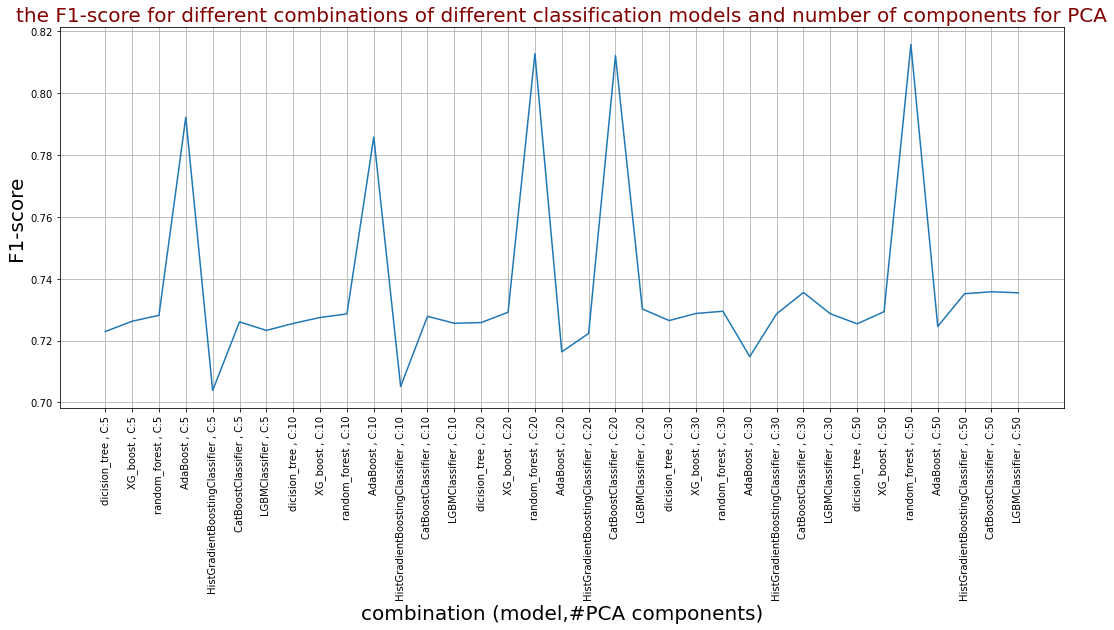

In [56]:
plt.figure(figsize=(18, 7))
plt.plot(combinations,f1_scores)
plt.grid()
plt.xticks(rotation=90) # rotate x-axis labels by 45 degrees.
plt.title("the F1-score for different combinations of different classification models and number of components for PCA",fontsize=20,color="maroon")
plt.xlabel("combination (model,#PCA components)",fontsize=20)
plt.ylabel("F1-score",fontsize=20)

plt.show()

In [46]:
print("===================================================================")
print(f"Best number of components for PCA , and best model Based on F1-score : {combinations[np.argmax(f1_scores)]}")
print(f"F1-score : {f1_scores[np.argmax(f1_scores)]}")
print("===================================================================")


Best number of components for PCA , and best model Based on F1-score : random_forest , C:50
F1-score : 0.8156862745098039


--------

<h3 style="color:maroon;">Build the BaseLine model with the best parameters </h3>

In [64]:
# random_forest
BaseLine_model = RandomForestClassifier(n_estimators=100, random_state=0)

# create instance from PCA 
pca = PCA(n_components=50,random_state=0)

# fit PCA 
X_train_pca =pca.fit_transform(X_train)
X_val_pca   =pca.transform(X_val)
X_test_pca   =pca.transform(X_test)

# fit the baseline model on the train data 
BaseLine_model.fit(X_train_pca, y_train)

# get predictions 
pred=BaseLine_model.predict(X_val_pca)
baseLine_f1_score_value =  f1_score(pred, y_val) 

In [65]:
baseLine_f1_score_value

0.8156862745098039

### Check the performance of the model using a 5-fold cross validation 

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      7383
           1       0.98      0.57      0.72      7382

    accuracy                           0.78     14765
   macro avg       0.84      0.78      0.77     14765
weighted avg       0.84      0.78      0.77     14765



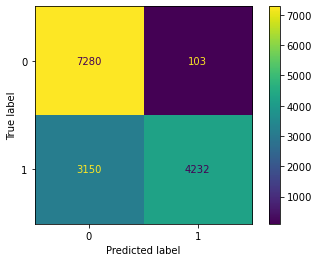

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      7383
           1       0.71      0.95      0.81      7382

    accuracy                           0.78     14765
   macro avg       0.82      0.78      0.77     14765
weighted avg       0.82      0.78      0.77     14765



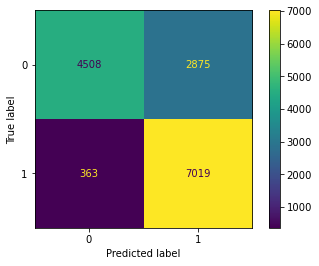

              precision    recall  f1-score   support

           0       0.70      0.96      0.81      7382
           1       0.94      0.59      0.73      7383

    accuracy                           0.78     14765
   macro avg       0.82      0.78      0.77     14765
weighted avg       0.82      0.78      0.77     14765



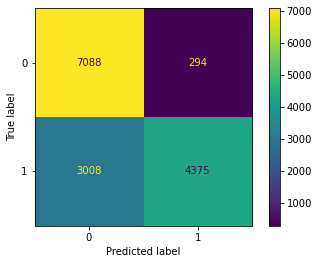

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      7382
           1       0.71      0.95      0.81      7383

    accuracy                           0.78     14765
   macro avg       0.82      0.78      0.78     14765
weighted avg       0.82      0.78      0.78     14765



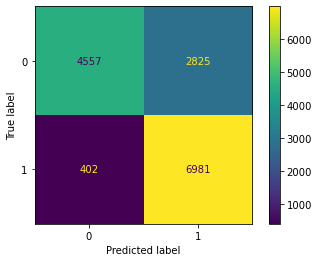

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      7382
           1       0.98      0.57      0.72      7382

    accuracy                           0.78     14764
   macro avg       0.84      0.78      0.77     14764
weighted avg       0.84      0.78      0.77     14764



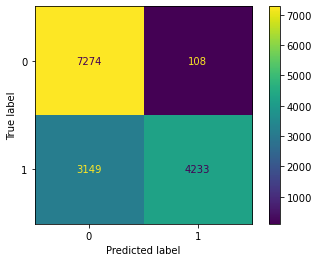

the f1-score in all iterations       : [0.72236921 0.81257235 0.72602058 0.81226366 0.72217009]
the mean of f1-scores                : 0.7590791778627459
the std  of f1-scores                : 0.04357265735592375


In [79]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
baseLine_mean,baseLine_std , baseLine_Score_Lst = apply_CV_F1(rf_clf,X_train_pca,y_train)

### Save the BaseLine model

In [69]:
# save the model to disk
import pickle
filename = 'BaseLine_model.pkl'
pickle.dump(BaseLine_model, open(filename, 'wb'))

In [70]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_pca, y_test)
print(result)

0.7803559817945384


-------------

In [17]:
f1_score = [0.72236921 ,0.81257235, 0.72602058, 0.81226366, 0.72217009]

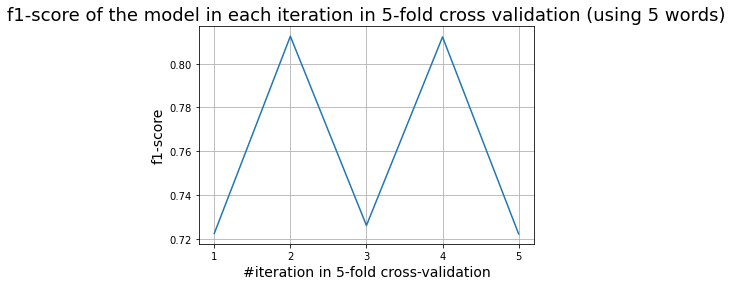

In [24]:
# Plotting the Graph
plt.plot(['1','2','3','4','5'], f1_score)
plt.title("f1-score of the model in each iteration in 5-fold cross validation (using 5 words)",fontsize=18)
plt.xlabel("#iteration in 5-fold cross-validation",fontsize=14)
plt.ylabel("f1-score",fontsize=14)
plt.grid()
plt.show()

## References 

[1] https://www.csmining.org/cdmc2021/index.php?id=5

[2] https://keras.io/api/applications/
    